# **Principal Component Analysis for Outlier Detection**


El Análisis de Componentes Principales (PCA) es una técnica estadística utilizada para reducir la dimensionalidad de conjuntos de datos, preservando la mayor cantidad de variabilidad posible. En el contexto de la detección de anomalías (outlier detection), el PCA se emplea para identificar observaciones que se desvían significativamente del patrón general de los datos.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import sys, os
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
plt.style.use('ggplot')
sns.set_context('notebook')


proj_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

from PyOD_ADGE.models.principal_component_analysis import PCA

In [64]:
url_data='https://drive.google.com/uc?export=download&id=1jGJ-Bam7dR9vH4Y6-677LNNpW-PulLfL'
data=pd.read_csv(url_data,header=0)
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [65]:
data.shape

(1000000, 8)

In [66]:
data['fraud']=data['fraud'].astype(np.int8)
data['fraud'].value_counts()


fraud
0    912597
1     87403
Name: count, dtype: int64

In [67]:
X_f=data.drop(['fraud'],axis=1)
y_f=data['fraud']
X,_,y,_= train_test_split(X_f,y_f,stratify=y_f,train_size=5000,random_state=42)

In [68]:
y.value_counts()

fraud
0    4563
1     437
Name: count, dtype: int64

In [69]:
X=StandardScaler().fit_transform(X)

In [70]:
X.mean(axis=0)

array([ 2.27373675e-17, -2.84217094e-17,  7.81597009e-18,  5.68434189e-18,
       -6.67910172e-17, -1.56319402e-17, -5.54223334e-17])

In [71]:
X.shape

(5000, 7)

In [72]:
model = PCA( contamination=0.01, n_components=2, random_state=42)
model.fit(X)

In [73]:
model.decision_scores_.shape
model.decision_scores_[0:10]

array([44.22489212, 34.51884423, 28.83252561, 17.49333897, 49.86461282,
       19.07853111, 29.33264862, 17.04380987, 27.63148861, 27.7456041 ])

Threshold for 95%:  52.13923003105487


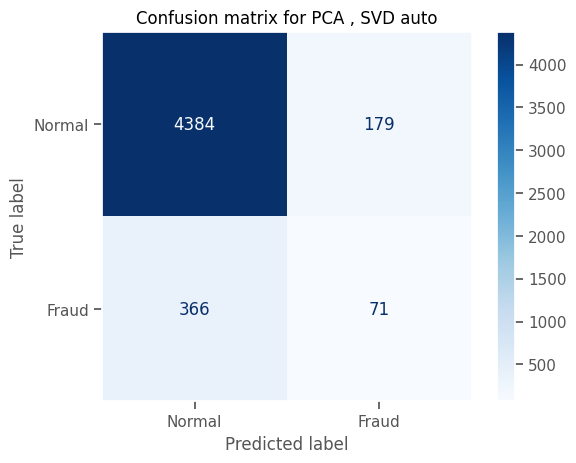

In [74]:
from sklearn.metrics import confusion_matrix

scores = model.decision_function(X)
thresh = np.percentile(model.decision_function(X), 95)
print('Threshold for 95%: ',thresh)
y_predcm = np.where(scores > thresh, 1, 0).astype(int)


cm=confusion_matrix(y,y_predcm)
fig,ax=plt.subplots()
disp=ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
disp.plot(cmap='Blues',ax=ax,colorbar=True)
ax.set_title('Confusion matrix for PCA , SVD auto')
ax.grid(False)
plt.show()

In [75]:
model2 = PCA( svd_solver="arpack", n_components=3, whiten=True , random_state=42)
model2.fit(X)

In [76]:
model2.decision_scores_.shape
model2.decision_scores_[0:10]

array([74.37928698, 55.22778745, 39.98478447, 24.3531277 , 73.44823646,
       25.89991656, 43.62395774, 23.83140532, 39.89752901, 38.70508474])

Threshold for 95%:  80.14844171116694


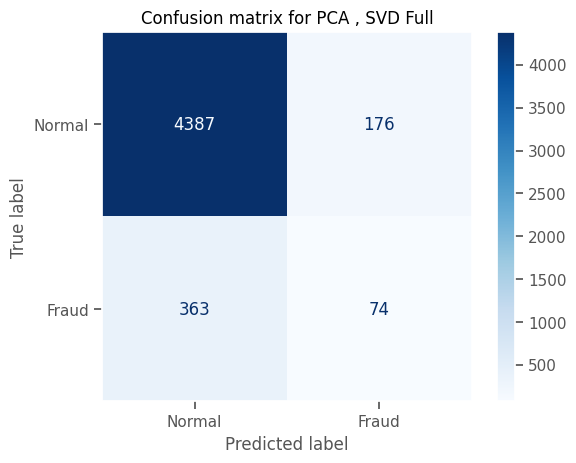

In [77]:
from sklearn.metrics import confusion_matrix

scores = model2.decision_function(X)
thresh = np.percentile(model2.decision_function(X), 95)
print('Threshold for 95%: ',thresh)
y_predcm = np.where(scores > thresh, 1, 0).astype(int)


cm=confusion_matrix(y,y_predcm)
fig,ax=plt.subplots()
disp=ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
disp.plot(cmap='Blues',ax=ax,colorbar=True)
ax.set_title('Confusion matrix for PCA , SVD Full')
ax.grid(False)
plt.show()

# Visualizacion

In [ ]:
model.explained_variance_ratio_
X_2D= model.fit_transform(X)

AttributeError: 'PCA' object has no attribute 'fit_transform'

NameError: name 'X_2D' is not defined

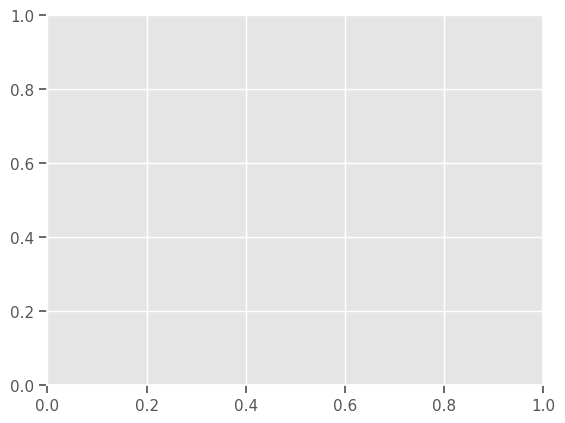

In [ ]:
fig,ax=plt.subplots()
sns.scatterplot(x=X_2D[:,0],y=X_2D[:,1],hue=y,ax=ax)
ax.set_title('PCA of the data')
plt.show()